<a href="https://colab.research.google.com/github/cagBRT/Machine-Learning/blob/master/FeatureSelection1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Remove features with low variance**

As an example, suppose that we have a dataset with boolean features, and we want to remove all features that are either one or zero (on or off) in more than 80% of the samples. Any data where 80% of the data is the same is considered low variance data. <br>

Features with a training-set variance lower than this threshold will be removed. <br>
**The default is to keep all features with non-zero variance**, i.e. remove the features that have the same value in all samples.


Create a datasest with 3 features

In [98]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
print(X)

[[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]


Remove all variables where the variance does not meet the threshold

As expected, VarianceThreshold has removed the first column, 
which had 0,0,1,0,0,0 <br>
There is very little variance in this column, so it will not add much information for our model to use when making predictions. So remove this column.  

In [100]:
sel = VarianceThreshold(threshold=(0.16))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

# **Assignment 1**
Remove any low variance data from the given dataset.<br>
<br>
[[0,1,2,0,2],[2,2,1,0,1],[1,1,1,0,1],[0,2,1,0,0],[2,1,1,0,0],[1,1,2,0,0],[2,2,0,0,1],[1,0,1,0,1],[0,2,1,0,1],[2,1,1,1,0],[0,1,1,0,2],[1,2,0,0,1],[2,1,1,2,1],[2,0,1,0,1]]

1. Find the lowest threshold that still produces a change in the dataset
2. Find the threshold to remove a second feature column

In [101]:
#Assignment 1
xx = [[0,1,2,0,2],[2,2,1,0,1],[1,1,1,0,1],[0,2,1,0,0],[2,1,1,0,0],[1,1,2,0,0],[2,2,0,0,1],[1,0,1,0,1],[0,2,1,0,1],[2,1,1,1,0],[0,1,1,0,2],[1,2,0,0,1],[2,1,1,0,1],[2,0,1,0,1]]


# **Univariate feature selection**

>SelectKBest removes all but the k highest scoring features<br>
<br>
SelectPercentile removes all but a user-specified highest scoring percentage of features<br>
<br>
Uses common univariate statistical tests for each feature:<br> 
* false positive rate SelectFpr<br>
* false discovery rate SelectFdr<br>
* family wise error SelectFwe<br>
* genericUnivariateSelect - selects the best strategy with a hyper parameter search estimator

**Example 1:**

SelectKBest removes all but the *k* highest scoring features

Get the Iris dataset

In [102]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

These functions take as input a scoring function that returns univariate scores and p-values (or only scores for SelectKBest and SelectPercentile)<br>
For regression use: f_regression, mutual_info_regression

For classification use: chi2, f_classif, mutual_info_classif
<br><br>
Then select the highest scoring features

In [104]:
#Use chi2 to score the the columns. Select the two columns that have the highest scores
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

(150, 2)

**Example 2: Check model performance after variable selection**

In [105]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

**Get data and add noise to the dataset**

As an experiment, use the Iris dataset, but add noise to it so that it has 24 features. 

In [106]:
# Import the Iris dataset
X, y = load_iris(return_X_y=True)

# Some noisy data not correlated
E = np.random.RandomState(42).uniform(0, 0.1, size=(X.shape[0], 20))

# Add the noisy data to the informative features
X = np.hstack((X, E))
X.shape


(150, 24)

**Do the train-test split**

In [107]:
# Split dataset to select feature and evaluate the classifier
X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, random_state=0
)

**Create an SVM model and train it on all the features**

In [108]:
# Compare to the weights of an SVM
clf = make_pipeline(MinMaxScaler(), LinearSVC())
clf.fit(X_train, y_train)
print('Classification accuracy without selecting features: {:.3f}'
      .format(clf.score(X_test, y_test)))

svm_weights = np.abs(clf[-1].coef_).sum(axis=0)
svm_weights /= svm_weights.sum()

Classification accuracy without selecting features: 0.789


**Create an SVM and train it with only the selected features**

In [109]:
#X_indices = np.arange(X.shape[-1])

# #############################################################################
#Using the SelectKBest function, select the best 4 best features to keep
# #############################################################################

selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

In [110]:
clf_selected = make_pipeline(
        SelectKBest(f_classif, k=4), MinMaxScaler(), LinearSVC()
)
clf_selected.fit(X_train, y_train)
print('Classification accuracy after univariate feature selection: {:.3f}'
      .format(clf_selected.score(X_test, y_test)))

svm_weights_selected = np.abs(clf_selected[-1].coef_).sum(axis=0)
svm_weights_selected /= svm_weights_selected.sum()

Classification accuracy after univariate feature selection: 0.868


It is clear the model that used only the highest scoring SelectKBest values has a higher performance. 

<Figure size 432x288 with 0 Axes>

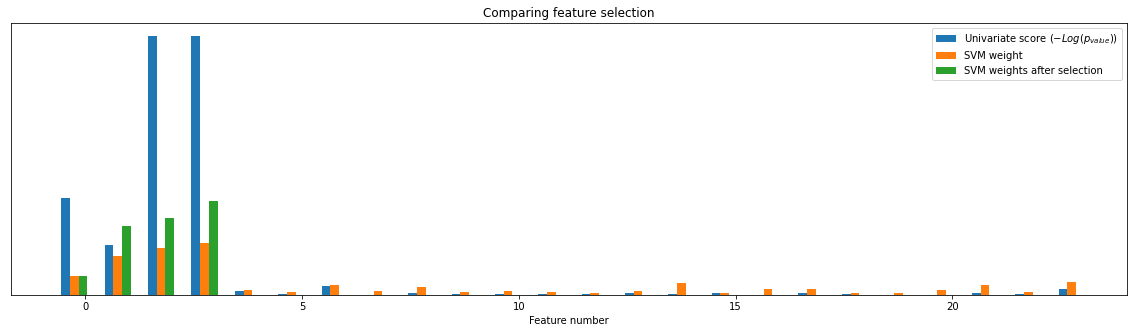

In [112]:
plt.figure(1)
plt.figure(figsize=(20,5))
plt.clf()

plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)')

plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight')

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection')

plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

# **Assignment 2**
The plot above shows two of the univariate scores are much higher that the other scores. <br>
Train the model using only the two highest scores. <br>
Does the model performance get better or worse?

In [ ]:
#Assignment 2


# **Recursive feature elimination**

Select features by recursively considering smaller and smaller sets of features


A recursive feature elimination example showing the relevance of pixels in a digit classification task

In [2]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

**Load the digits dataset (classification)**.<br>

Each datapoint is a 8x8 image of a digit.<br>
>Classes: 10<br>
>Samples per class: ~180<br>
>Samples total: 1797<br>
>Dimensionality: 64<br>
>Features: integers 0-9

In [19]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [20]:
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

Look at one of the digits, the number 9

<Figure size 432x288 with 0 Axes>

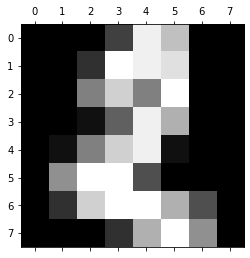

In [31]:
choice = 2
plt.gray() 
plt.matshow(digits.images[choice]) 
plt.show() 

There are 64 pixels in the image. <br>
Which ones are important to the model and which ones can we prune?

In [32]:
X[choice]

array([ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
       14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
        1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
        0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  3., 13., 16.,
       16., 11.,  5.,  0.,  0.,  0.,  0.,  3., 11., 16.,  9.,  0.])

In [33]:
y[choice]

2

Create the Recursive Feature Elimination (RFE) object and rank each pixel

In [51]:
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(digits.images[0].shape)

List the ranks assigned to each pixel. <br>
The higher the ranking corresponds to which should be pruned first. 

In [52]:
ranking

array([[64, 50, 31, 23, 10, 17, 34, 51],
       [57, 37, 30, 43, 14, 32, 44, 52],
       [54, 41, 19, 15, 28,  8, 39, 53],
       [55, 45,  9, 18, 20, 38,  1, 59],
       [63, 42, 25, 35, 29, 16,  2, 62],
       [61, 40,  5, 11, 13,  6,  4, 58],
       [56, 47, 26, 36, 24,  3, 22, 48],
       [60, 49,  7, 27, 33, 21, 12, 46]])

Plot pixel ranking

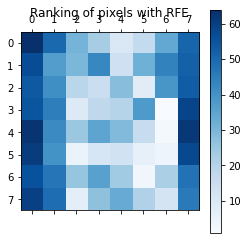

In [53]:
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

# **Assignment 3**
Right now the model is saving only one pixel. Change the number of pixels saved to 48 pixels. <br>
Rerun the ranking of the pixels. <br>
Then run the code below.<br>
Which pixels were removed? <br>
After removing the pixels compare the performance of the reduced pixel images to the performance of the full image. <br>
How much of a difference is there in the accuracy scores?

In [54]:
model = DecisionTreeClassifier()
#List of (name, transform) tuples (implementing fit/transform) that are chained, 
#in the order in which they are chained, with the last object an estimator.
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
pipeline.fit(X, y)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.241 (0.037)


In [50]:
model.fit(X, y)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.855 (0.025)


**RFE Example  2**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

**Create the data with 3 informative features and 25 features total**

In [ ]:
# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

**Create the RFE object**<br>
Using a cross-validated score, recursively eliminate the less important features

In [ ]:
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 3


**Plot the score vs number of features selected**

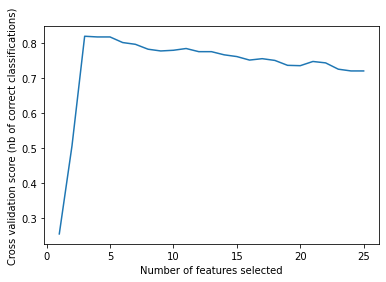

In [ ]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# **SelectFromModel**

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

**Create data**

In [ ]:
X = [[ 0.87, -1.34,  0.31, -0.99],
     [-2.79, -0.02, -0.85, 0.5 ],
     [-1.34, -0.48, -2.55, 2.01 ],
     [ 1.92,  1.48,  0.65, 0.95 ]]
y = [0, 1, 0, 1]

Use SelectFromModel to determine which features are more important<br>
True = important feature
False =  not important feature

In [ ]:
selector = SelectFromModel(estimator=LogisticRegression()).fit(X, y)
print("selector estimator coef: ", selector.estimator_.coef_)
print("selector threshold: ",selector.threshold_)
print("selector get support: ",selector.get_support())

selector estimator coef:  [[-0.32308208  0.81794891  0.51921648  0.06107848]]
selector threshold:  0.4303314870543895
selector get support:  [False  True  True False]


In [ ]:
selector.transform(X)

array([[-1.34,  0.31],
       [-0.02, -0.85],
       [-0.48, -2.55],
       [ 1.48,  0.65]])

# **Tree-based feature selection**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

Load the Iris datset

In [ ]:
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [ ]:
X[1]

array([4.9, 3. , 1.4, 0.2])

Use the trees classifier to determine the important features

In [ ]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_      

array([0.1037284 , 0.06541328, 0.42891868, 0.40193964])

Create a new dataset that uses only the most important features

In [ ]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape 

(150, 2)

In [ ]:
X_new[1]

array([1.4, 0.2])

Tree based example 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

Create synthetic data<br>
>10 features, 3 of them informative


In [ ]:
# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

**Build a forest** and compute the impurity-based feature importances

In [ ]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

**Print the feature ranking**

In [ ]:
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 1 (0.295902)
2. feature 2 (0.208351)
3. feature 0 (0.177632)
4. feature 3 (0.047121)
5. feature 6 (0.046303)
6. feature 8 (0.046013)
7. feature 7 (0.045575)
8. feature 4 (0.044614)
9. feature 9 (0.044577)
10. feature 5 (0.043912)


**Plot the impurity-based feature importances of the forest**

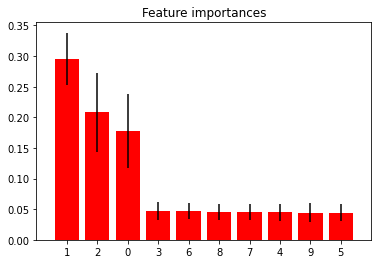

In [ ]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()